In [1]:
from google.colab import files

uploaded = files.upload()

Saving audio 1.m4a to audio 1 (3).m4a
Saving audio 2.m4a to audio 2 (3).m4a


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from librosa.sequence import dtw

# ---------------------------------------------------
# Load audio safely (downsample to avoid runtime crash)
# ---------------------------------------------------
s1, sr1 = librosa.load("audio 2.m4a", sr=4000)
s2, sr2 = librosa.load("audio 1.m4a", sr=4000)

# Trim silence (phone audio usually has long silence parts)
s1, _ = librosa.effects.trim(s1)
s2, _ = librosa.effects.trim(s2)


/tmp/ipython-input-3622011605.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  s1, sr1 = librosa.load("audio 2.m4a", sr=4000)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-3622011605.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  s2, sr2 = librosa.load("audio 1.m4a", sr=4000)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [17]:
s1 = s1 / np.max(np.abs(s1))
s2 = s2 / np.max(np.abs(s2))


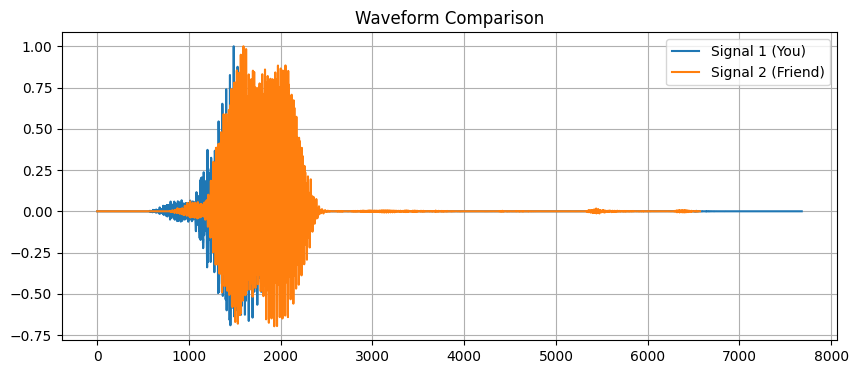

In [18]:
plt.figure(figsize=(10,4))
plt.plot(s1, label="Signal 1 (You)")
plt.plot(s2, label="Signal 2 (Friend)")
plt.title("Waveform Comparison")
plt.legend()
plt.grid(True)
plt.show()


DTW Distance: 2006.0013606587122


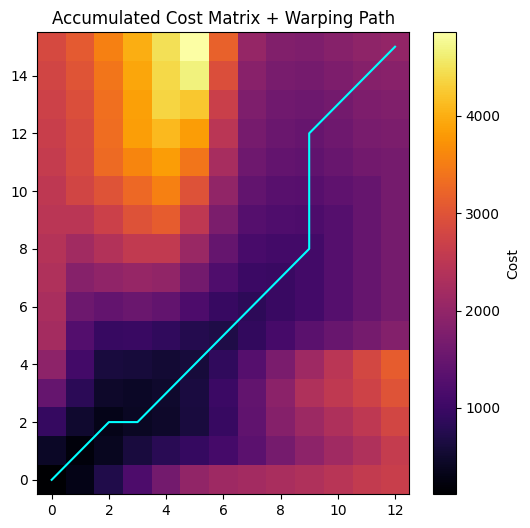

In [19]:
# ---------------------------------------------------
# Convert signals to MFCCs for safe DTW computation
# ---------------------------------------------------
mfcc1 = librosa.feature.mfcc(y=s1, sr=sr1, n_mfcc=20)
mfcc2 = librosa.feature.mfcc(y=s2, sr=sr2, n_mfcc=20)

# ---------------------------------------------------
# Perform DTW on MFCC feature matrices
D, wp = dtw(mfcc1, mfcc2)

dtw_distance = D[-1, -1]
print("DTW Distance:", dtw_distance)

# ---------------------------------------------------
# Visualize alignment (cost matrix + warping path)
# ---------------------------------------------------
plt.figure(figsize=(6,6))
plt.imshow(D, cmap='inferno', origin='lower', aspect='auto')
plt.title("Accumulated Cost Matrix + Warping Path")

wp_x = [p[1] for p in wp]
wp_y = [p[0] for p in wp]
plt.plot(wp_x, wp_y, color='cyan')
plt.colorbar(label="Cost")
plt.show()